In [22]:
import pypsa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
prefix = "/mnt/c/Users/scl38887/Documents/git/"
constant = "aldehyde/workflow/subworkflows/pypsa-earth-sec/results/test_shipping_cons_3H_ws/postnetworks/elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc"
ship= "aldehyde/workflow/subworkflows/pypsa-earth-sec/results/test_shipping_3H_ws/postnetworks/elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc"


n_cons = pypsa.Network(prefix + constant)
n_ship = pypsa.Network(prefix + ship)

INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores
INFO:pypsa.io:Imported network elec_s_10_ec_lc1.0_Co2L0.60_3H_2030_0.15_DF_9export.nc has buses, carriers, generators, global_constraints, lines, links, loads, storage_units, stores


In [32]:
# Check sum
n_cons.loads_t.p["H2 export load"].sum()/1e3

2999.9999999999995

In [33]:

n_ship.loads_t.p["H2 export load"].sum()/1e3

3000.0

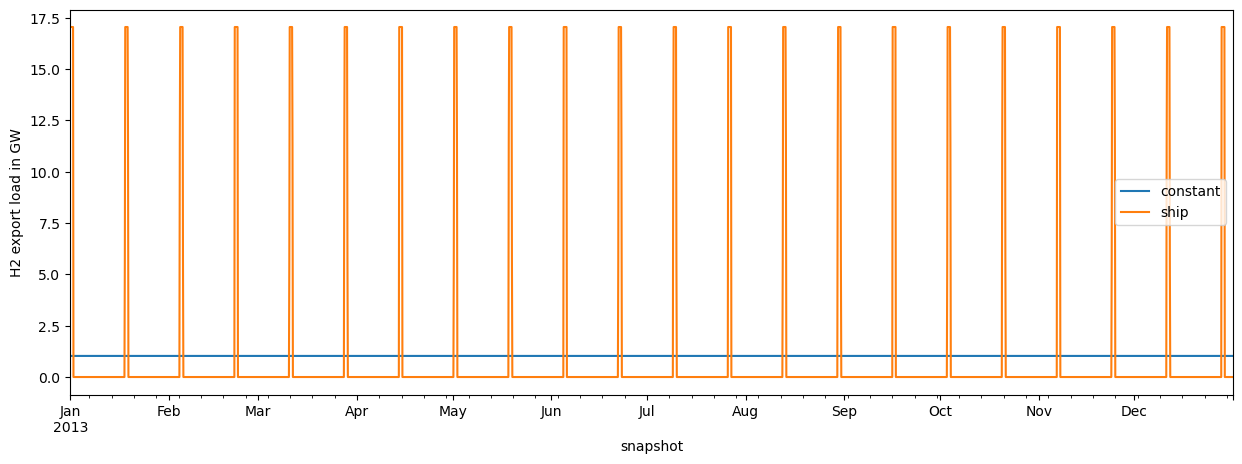

In [28]:
fig = plt.figure(figsize=(15, 5))
(n_cons.loads_t.p["H2 export load"]/1e3).plot(label="constant")
(n_ship.loads_t.p["H2 export load"]/1e3).plot(label="ship")
plt.legend()
plt.ylabel("H2 export load in GW")
plt.show()